# Exemple d'utilisation d'un jeu de données CTD sous forme de profil (données d'une colonne d'eau)

Pour plus de contexte voir: [README](https://github.com/OGSL-SLGO/examples/blob/main/examples/ctd-profile/)

## Partie 2: Affichage de profils

Nous allons afficher des profils CTD de la station ***PMZA-VAS***


Téléchargeons les données allant du ***1er janvier 2021*** au ***31 octobre 2021*** pour la station ***PMZA-VAS***

In [1]:
import pandas as pd

data_url = "https://erddap.ogsl.ca/erddap/tabledap/mpoPmzaVikingCtdInsitu.csv?station_id%2Ctime%2Cobs_lat%2Cobs_lon%2Clatitude%2Clongitude%2Cprofile%2Cdepth%2CTE90_01%2CPRES_01%2CPSAL_01%2CFLOR_01%2CDOXY_01&time%3E=2022-06-06T00%3A00%3A00Z&time%3C=2022-07-06T20%3A01%3A44Z"

dataframe = pd.read_csv(data_url, header=[0,1])
dataframe.head()


,station_id,time,obs_lat,obs_lon,latitude,longitude,profile,depth,TE90_01,PRES_01,PSAL_01,FLOR_01,DOXY_01
,Unnamed: 0_level_1,UTC,Degrees north,Degrees east,degrees_north,degrees_east,Unnamed: 6_level_1,m,degree_C,decibar,PSU,mg/m^3,micromol/L
0,AZMP-ESG,2022-06-06T09:31:43Z,46.7995,-62.001,46.8,-62.0,AZMP-ESG-22/06/06-09:31:43,0.105122,8.2790,0.106,29.7167,0.669,NaN
1,AZMP-ESG,2022-06-06T09:31:43Z,46.7995,-62.001,46.8,-62.0,AZMP-ESG-22/06/06-09:31:43,0.185451,8.2813,0.187,29.7178,0.669,NaN
2,AZMP-ESG,2022-06-06T09:31:43Z,46.7995,-62.001,46.8,-62.0,AZMP-ESG-22/06/06-09:31:43,0.233054,8.2826,0.235,29.7189,0.669,362.37
3,AZMP-ESG,2022-06-06T09:31:43Z,46.7995,-62.001,46.8,-62.0,AZMP-ESG-22/06/06-09:31:43,0.300490,8.2850,0.303,29.7167,0.669,362.37
4,AZMP-ESG,2022-06-06T09:31:43Z,46.7995,-62.001,46.8,-62.0,AZMP-ESG-22/06/06-09:31:43,0.355035,8.2879,0.358,29.7075,0.669,362.37


Supprimons la deuxième ligne d'en-tête car elle va gêner panda et plotly:

In [2]:
dataframe.columns = dataframe.columns.droplevel(-1)
dataframe.head()

,station_id,time,obs_lat,obs_lon,latitude,longitude,profile,depth,TE90_01,PRES_01,PSAL_01,FLOR_01,DOXY_01
0,AZMP-ESG,2022-06-06T09:31:43Z,46.7995,-62.001,46.8,-62.0,AZMP-ESG-22/06/06-09:31:43,0.105122,8.2790,0.106,29.7167,0.669,NaN
1,AZMP-ESG,2022-06-06T09:31:43Z,46.7995,-62.001,46.8,-62.0,AZMP-ESG-22/06/06-09:31:43,0.185451,8.2813,0.187,29.7178,0.669,NaN
2,AZMP-ESG,2022-06-06T09:31:43Z,46.7995,-62.001,46.8,-62.0,AZMP-ESG-22/06/06-09:31:43,0.233054,8.2826,0.235,29.7189,0.669,362.37
3,AZMP-ESG,2022-06-06T09:31:43Z,46.7995,-62.001,46.8,-62.0,AZMP-ESG-22/06/06-09:31:43,0.300490,8.2850,0.303,29.7167,0.669,362.37
4,AZMP-ESG,2022-06-06T09:31:43Z,46.7995,-62.001,46.8,-62.0,AZMP-ESG-22/06/06-09:31:43,0.355035,8.2879,0.358,29.7075,0.669,362.37


Affichons les profils de température, en ajoutant un controle sur les données de temps

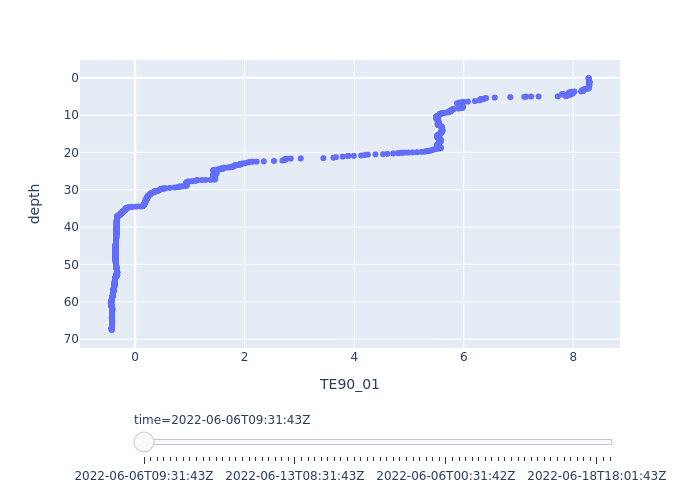

In [3]:
import plotly.express as px

fig = px.scatter(dataframe, x="TE90_01", y="depth", animation_frame="time")

fig.update_yaxes(autorange="reversed")
fig.update_layout(showlegend=False)

# Remove "png" to display an interactive graph
# Le mode intéractif permet de voir de nombre de profils d'une journée avec le curseur de la souris
fig["layout"].pop("updatemenus")
fig.show("png")